In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

import requests
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
#add latitude and longitudes to a list
coordinates= list(lat_lngs)

In [5]:
#use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

salalah om
bluff nz
vila velha br
rikitea pf
kholtoson ru
ushuaia ar
taolanaro mg
kapuskasing ca
poum nc
provideniya ru
mataura pf
port alfred za
bilibino ru
port elizabeth za
bluff nz
bluff nz
itarema br
stromness gb
lebedinyy ru
iseyin ng
la ronge ca
cherskiy ru
nemuro jp
vakhrushi ru
karauzyak uz
avera pf
hasaki jp
talnakh ru
punta arenas cl
tomatlan mx
ketchikan us
rikitea pf
kamenka ru
micheweni tz
skibbereen ie
maningrida au
kavieng pg
cape town za
ketchikan us
stoyba ru
samusu ws
hilo us
verkhnyaya inta ru
tuktoyaktuk ca
kerki tm
hilo us
willmar us
jamestown sh
arraial do cabo br
batemans bay au
ushuaia ar
saint-augustin ca
barrow us
punta arenas cl
albany au
mataura pf
kavarna bg
tuktoyaktuk ca
busselton au
mount isa au
zyryanskoye ru
hermanus za
mys shmidta ru
lensk ru
new norfolk au
umzimvubu za
ushuaia ar
mar del plata ar
kalmunai lk
taolanaro mg
maceio br
shimoda jp
port alfred za
rikitea pf
torbay ca
ushuaia ar
vaitupu wf
chokurdakh ru
tiksi ru
illoqqortoormiut gl
hervey b

arraial do cabo br
yellowknife ca
grand centre ca
kaeo nz
pemangkat id
airai pw
okhotsk ru
mahebourg mu
vila franca do campo pt
mataura pf
albany au
ribeira grande pt
tual id
fort nelson ca
airai pw
hobart au
rtishchevo ru
norman wells ca
saint george bm
nikolskoye ru
kodiak us
bluff nz
longyearbyen sj
ushuaia ar
butaritari ki
nizhneyansk ru
chuy uy
kahului us
namibe ao
punta arenas cl
punta arenas cl
salalah om
victoria sc
qaqortoq gl
upernavik gl
poquoson us
avarua ck
powell river ca
rikitea pf
taolanaro mg
dikson ru
thompson ca
qaqortoq gl
georgetown gy
rockport us
bredasdorp za
albany au
hobart au
ruatoria nz
port-cartier ca
tuktoyaktuk ca
fort nelson ca
san patricio mx
garowe so
aguilas es
sunland park us
mataura pf
saint-philippe re
dikson ru
amderma ru
cabo san lucas mx
prado br
hobart au
nikolskoye ru
laguna br
nizhneyansk ru
magadan ru
arica cl
kirkwall gb
ancud cl
cherskiy ru
samarai pg
castro cl
butaritari ki
saint-philippe re
georgetown sh
atuona pf
punta arenas cl
torbay c

arraial do cabo br
east london za
punta arenas cl
hermanus za
port alfred za
qasigiannguit gl
taolanaro mg
punta arenas cl
bataipora br
bukachacha ru
barrow us
verkhnyaya inta ru
samusu ws
rikitea pf
busselton au
hobart au
taolanaro mg
hamilton bm
ribas do rio pardo br
chokurdakh ru
carnarvon au
ghoti in
hermanus za
parrsboro ca
lorengau pg
atuona pf
richards bay za
toktogul kg
upernavik gl
along in
warqla dz
bintakay ph
chaumont fr
hirara jp
karaul ru
hualmay pe
ushuaia ar
auki sb
chuy uy
tuktoyaktuk ca
tumannyy ru
port alfred za
busselton au
tuktoyaktuk ca
ushuaia ar
lebu cl
pacific grove us
langsa id
bredasdorp za
mar del plata ar
avarua ck
illoqqortoormiut gl
beringovskiy ru
esperance au
vaini to
port elizabeth za
saleaula ws
makung tw
green river us
dikson ru
albany au
alghero it
roma au
bluff nz
ambilobe mg
newport us
brae gb
grand gaube mu
faanui pf
busselton au
ushuaia ar
okhotsk ru
tiksi ru
victor harbor au
lavrentiya ru
saint-philippe re
jamestown sh
ponta do sol cv
bambous v

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | salalah
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | vila velha
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | kholtoson
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | kapuskasing
Processing Record 9 of Set 1 | poum
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | itarema
Processing Record 16 of Set 1 | stromness
Processing Record 17 of Set 1 | lebedinyy
Processing Record 18 of Set 1 | iseyin
Processing Record 19 of Set 1 | la ronge
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | nemuro
Processing Record 22 of Set 1 | vakhrushi
Processing Record 23 of Set 1 | karauzyak
City not found. Skipping...
Pro

Processing Record 37 of Set 4 | arlit
Processing Record 38 of Set 4 | bujaru
Processing Record 39 of Set 4 | skagastrond
City not found. Skipping...
Processing Record 40 of Set 4 | bambous virieux
Processing Record 41 of Set 4 | prince rupert
Processing Record 42 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 43 of Set 4 | araouane
Processing Record 44 of Set 4 | grindavik
Processing Record 45 of Set 4 | nuuk
Processing Record 46 of Set 4 | kalabo
Processing Record 47 of Set 4 | charlestown
Processing Record 48 of Set 4 | afmadu
City not found. Skipping...
Processing Record 49 of Set 4 | zhuhai
Processing Record 50 of Set 4 | the pas
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | cockburn town
Processing Record 3 of Set 5 | castro
Processing Record 4 of Set 5 | mitsamiouli
Processing Record 5 of Set 5 | kavaratti
Processing Record 6 of Set 5 | azul
Processing Record 7 of Set 5 | yulara
Processing Record 8 of Set 5 | isangel
Processing Record 9 of

Processing Record 27 of Set 8 | tapaua
City not found. Skipping...
Processing Record 28 of Set 8 | manono
Processing Record 29 of Set 8 | leningradskiy
Processing Record 30 of Set 8 | mrirt
City not found. Skipping...
Processing Record 31 of Set 8 | baruun-urt
Processing Record 32 of Set 8 | cap-aux-meules
Processing Record 33 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 34 of Set 8 | kaitangata
Processing Record 35 of Set 8 | namatanai
Processing Record 36 of Set 8 | saint combs
City not found. Skipping...
Processing Record 37 of Set 8 | haines junction
Processing Record 38 of Set 8 | canon city
Processing Record 39 of Set 8 | olafsvik
Processing Record 40 of Set 8 | fortuna
Processing Record 41 of Set 8 | sao raimundo nonato
Processing Record 42 of Set 8 | taoudenni
Processing Record 43 of Set 8 | valparaiso
Processing Record 44 of Set 8 | cedar rapids
Processing Record 45 of Set 8 | hay river
Processing Record 46 of Set 8 | sampit
Processing Record 47 of Se

Processing Record 12 of Set 12 | ostrovnoy
Processing Record 13 of Set 12 | gairo
Processing Record 14 of Set 12 | saint-francois
Processing Record 15 of Set 12 | sangar
Processing Record 16 of Set 12 | marawi
Processing Record 17 of Set 12 | coahuayana
Processing Record 18 of Set 12 | mata
Processing Record 19 of Set 12 | antalaha
Processing Record 20 of Set 12 | uzumlu
City not found. Skipping...
Processing Record 21 of Set 12 | haibowan
City not found. Skipping...
Processing Record 22 of Set 12 | deming
Processing Record 23 of Set 12 | havoysund
Processing Record 24 of Set 12 | kharp
Processing Record 25 of Set 12 | cochrane
Processing Record 26 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 27 of Set 12 | eyemouth
Processing Record 28 of Set 12 | ahipara
Processing Record 29 of Set 12 | maidstone
Processing Record 30 of Set 12 | cadillac
Processing Record 31 of Set 12 | neusiedl am see
Processing Record 32 of Set 12 | qasigiannguit
Processing Record 33 of Set 12

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Salalah,17.0151,54.0924,78.42,66,8,4.18,OM,2021-10-23 16:57:52
1,Bluff,-46.6000,168.3333,52.70,86,100,3.31,NZ,2021-10-23 16:55:43
2,Vila Velha,-20.3297,-40.2925,78.75,69,40,14.97,BR,2021-10-23 16:55:15
3,Rikitea,-23.1203,-134.9692,74.50,82,67,19.71,PF,2021-10-23 16:56:33
4,Kholtoson,50.2981,103.3097,33.01,54,100,1.90,RU,2021-10-23 16:59:39
5,Ushuaia,-54.8000,-68.3000,44.22,87,90,24.16,AR,2021-10-23 16:57:43
6,Kapuskasing,49.4169,-82.4331,39.29,93,90,11.50,CA,2021-10-23 16:58:40
7,Poum,-20.2333,164.0167,73.81,80,4,14.54,NC,2021-10-23 16:59:40
8,Provideniya,64.3833,-173.3000,23.07,78,100,8.72,RU,2021-10-23 16:59:40
9,Mataura,-46.1927,168.8643,49.78,92,100,0.81,NZ,2021-10-23 16:59:40


In [14]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df= city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Salalah,OM,2021-10-23 16:57:52,17.0151,54.0924,78.42,66,8,4.18
1,Bluff,NZ,2021-10-23 16:55:43,-46.6000,168.3333,52.70,86,100,3.31
2,Vila Velha,BR,2021-10-23 16:55:15,-20.3297,-40.2925,78.75,69,40,14.97
3,Rikitea,PF,2021-10-23 16:56:33,-23.1203,-134.9692,74.50,82,67,19.71
4,Kholtoson,RU,2021-10-23 16:59:39,50.2981,103.3097,33.01,54,100,1.90


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

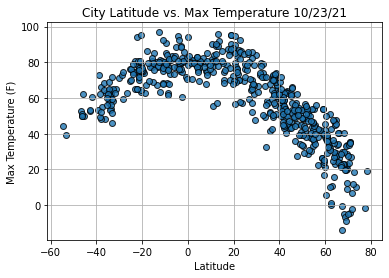

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

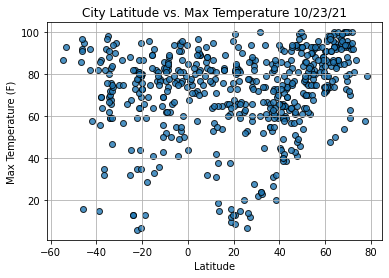

In [19]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

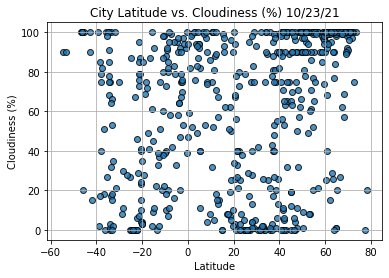

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

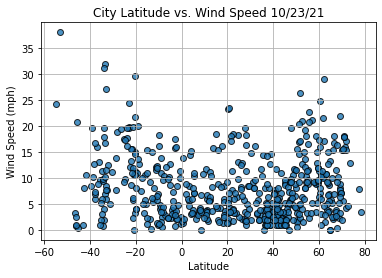

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

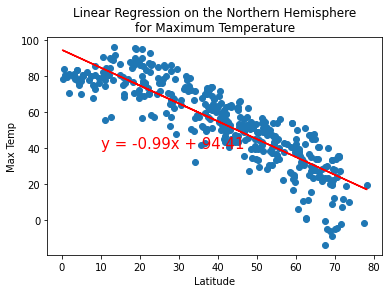

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' '\n'
                        'for Maximum Temperature', 'Max Temp',(10,40))

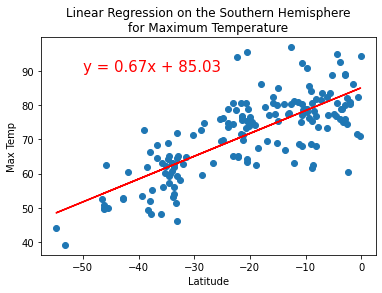

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                        'for Maximum Temperature', 'Max Temp',(-50,90))

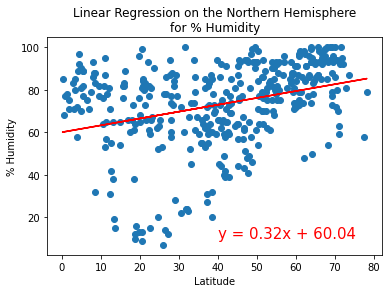

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' '\n'
                        'for % Humidity', '% Humidity',(40,10))

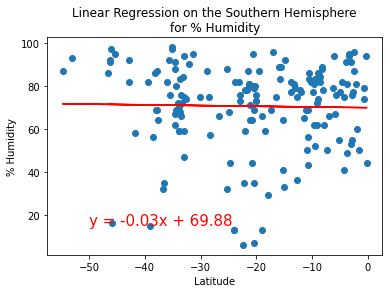

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                        'for % Humidity', '% Humidity',(-50,15))

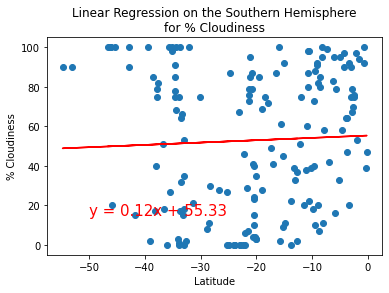

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                        'for % Cloudiness', '% Cloudiness',(-50,15))

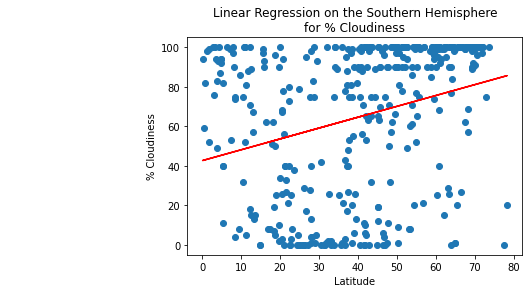

In [37]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                        'for % Cloudiness', '% Cloudiness',(-50,15))

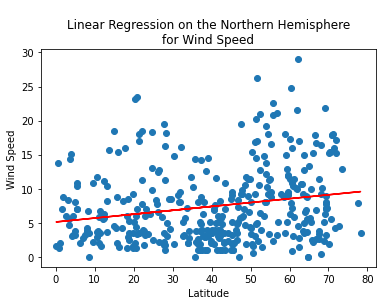

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' '\n'
                        'for Wind Speed', 'Wind Speed',(40,35))

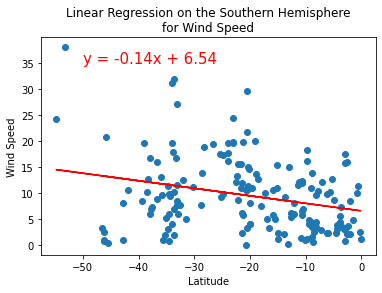

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                        'for Wind Speed', 'Wind Speed',(-50,35))